**------------------------Questions Covered-----------------------------**

**17	Trie	https://www.geeksforgeeks.org/sorting-array-strings-words-using-trie-set-2-handling-duplicates/																									
17	Trie	https://www.geeksforgeeks.org/word-break-problem-trie-solution/	repeated but trie imlementation																								
17	Trie	https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together-set-2/	repeated but trie imlementation																								
17	Trie	https://www.geeksforgeeks.org/implement-a-phone-directory/																									
17	Trie	https://www.geeksforgeeks.org/print-words-matching-pattern-camelcase-notation-dictonary/																									
17	Trie	https://www.geeksforgeeks.org/print-unique-rows/																									
17	Trie	https://www.geeksforgeeks.org/count-distinct-substrings-string-using-suffix-trie/																									
17	HR - Greedy & DP	https://www.hackerrank.com/challenges/equal/problem																									
17	HR - Greedy & DP	https://www.hackerrank.com/challenges/sherlock-and-cost/problem																									
17	HR - Greedy & DP	https://www.hackerrank.com/challenges/sam-and-substrings/problem																							
18	HR - Greedy & DP	https://www.hackerrank.com/challenges/candies/problem
<br>
20	Union Find	https://www.geeksforgeeks.org/tag/union-find/																									
20	Union Find	https://www.geeksforgeeks.org/union-find/
<br>
2	Searching & Sorting-54	https://www.geeksforgeeks.org/median-of-two-sorted-arrays-of-different-sizes/	Pep_JavaIP_2SnS_54MedianOfTwoSortedArrays																								
8	Stacks & Queues-247	https://www.geeksforgeeks.org/efficiently-implement-k-stacks-single-array/	very very tough but needs good brain exerise																								
8	Stacks & Queues-257	https://www.geeksforgeeks.org/efficiently-implement-k-queues-single-array/	very tough but similar to k stacks***

In [1]:
import java.util.*;
import java.io.*;
String[] args =new String[0];

## **485. Sorting array of strings (or words) using Trie | Set-2 (Handling Duplicates)**
https://www.geeksforgeeks.org/sorting-array-strings-words-using-trie-set-2-handling-duplicates/

In [2]:
/*
Given an array of strings, 
    print them in alphabetical (dictionary) order.
    If there are duplicates in input array, we need to print all the occurrences.
*/

In [3]:
/*
Examples:

Input : arr[] = { "abc", "xyz", "abcd", "bcd", "abc" }
Output : abc abc abcd bcd xyz

Input : arr[] = { "geeks", "for", "geeks", "a", "portal", 
                  "to", "learn" }
Output : a for geeks geeks learn portal to
*/

**Pre-Requisite :**   ***https://www.geeksforgeeks.org/trie-insert-and-search/***

**Related Link :**   ***https://www.geeksforgeeks.org/sorting-array-strings-words-using-trie/***

In [4]:
/*
Approach: 

In the previous post (above Related Link) array of strings is being sorted, 
printing only single occurrence of duplicate strings. 

In this post all occurrences of duplicate strings are printed in lexicographic order. 
To print the strings in alphabetical order we have to first insert them in the trie 
and then perform preorder traversal to print in alphabetical order.

The nodes of trie contain an index[] array which stores the index position of all the strings of arr[] ending at that node. 
Except for trie’s leaf node all the other nodes have size 0 for the index[] array.
*/

In [5]:
class Trie { 
  
    private Node rootNode; 
  
    /*to make new trie*/
    Trie()  
    { 
        rootNode = null; 
    } 
  
    // function to insert  
    // a string in trie 
    void insert(String key, int index)  
    { 
        // making a new path 
        // if not already 
        if (rootNode == null)  
        { 
            rootNode = new Node(); 
        } 
  
        Node currentNode = rootNode; 
  
        for (int i = 0;i < key.length();i++)  
        { 
            char keyChar = key.charAt(i); 
      
            if (currentNode.getChild(keyChar) == null)  
            { 
                currentNode.addChild(keyChar); 
            } 
              
            // go to next node 
            currentNode = currentNode.getChild(keyChar); 
        } 
  
        // Mark leaf (end of string) 
        // and store index of 'str'  
        // in index[] 
        currentNode.addIndex(index); 
    } 
  
    void traversePreorder(String[] array)  
    { 
        traversePreorder(rootNode, array); 
    } 
  
    // function for preorder 
    // traversal of trie 
    private void traversePreorder(Node node, 
                             String[] array) 
    { 
        if (node == null)  
        { 
            return; 
        } 
  
        if (node.getIndices().size() > 0)  
        { 
            for (int index : node.getIndices())  
            { 
                System.out.print(array[index] + " "); 
            } 
        } 
  
        for (char index = 'a';index <= 'z';index++)  
        { 
            traversePreorder(node.getChild(index), array); 
        } 
    } 
  
    private static class Node { 
  
        private Node[] children; 
        private List<Integer> indices; 
  
        Node() 
        { 
            children = new Node[26]; 
            indices = new ArrayList<>(0); 
        } 
  
        Node getChild(char index)  
        { 
            if (index < 'a' || index > 'z') 
            { 
                return null; 
            } 
              
            return children[index - 'a']; 
        } 
  
        void addChild(char index)  
        { 
            if (index < 'a' || index > 'z')  
            { 
                return; 
            } 
              
            Node node = new Node(); 
            children[index - 'a'] = node; 
        } 
  
        List<Integer> getIndices()  
        { 
            return indices; 
        } 
  
        void addIndex(int index) 
        { 
            indices.add(index); 
        } 
    } 
} 

In [6]:
class SortStrings { 
  
    // Driver program  
    public static void main(String[] args) 
    { 
        String[] array = { "abc", "xyz", 
                    "abcd", "bcd", "abc" }; 
        printInSortedOrder(array); 
    } 
  
    // function to sort an array 
    // of strings using Trie 
    private static void printInSortedOrder(String[] array) 
    { 
        Trie trie = new Trie(); 
          
        for (int i = 0;i < array.length;i++)  
        { 
            trie.insert(array[i], i); 
        } 
          
        trie.traversePreorder(array); 
    } 
} 
SortStrings.main(args);

abc abc abcd bcd xyz 

In [7]:
/*
Time Complexity: 

Worst case occurs when every string is starting with a different character. 
In that case, 
    it will visit all the nodes of each character of each string. 
    
So worst-case time complexity will be the sum of the length of every string
i.e. O(|S1| + |S2| + |S3| + … + |Sn|) where |S| is the length of the string.
*/

## **486. Word Break Problem | (Trie solution)**
https://www.geeksforgeeks.org/word-break-problem-trie-solution/

In [8]:
/*
Given an input string and a dictionary of words,
    find out if the input string can be segmented into a space-separated sequence of dictionary words.
*/

In [9]:
/*
See following examples for more details.

Consider the following dictionary 
{ i, like, sam, sung, samsung, mobile, ice, 
  cream, icecream, man, go, mango}

Input:  ilike
Output: Yes 
The string can be segmented as "i like".

Input:  ilikesamsung
Output: Yes
The string can be segmented as "i like samsung" or 
"i like sam sung".
*/

**Word Break Problem (DP Solution) :**   ***https://www.geeksforgeeks.org/dynamic-programming-set-32-word-break-problem/***

In [10]:
/*
In the above post, 
    a simple array is used to store and search words in a dictionary. 
    
Here we use Trie to do these tasks quickly.
*/

***https://ideone.com/7P6pOK***

## **487. Given a sequence of words, print all anagrams together | Set 2**
https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together-set-2/

In [11]:
/*
Given an array of words, 
    print all anagrams together. 
*/

In [12]:
/*
For example, 
    if the given array is {“cat”, “dog”, “tac”, “god”, “act”}, 
        then output may be “cat tac act dog god”.
*/

***https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together/***

In [13]:
/*
Trie data structure can be used for a more efficient solution. 

Insert the sorted order of each word in the trie.
Since all the anagrams will end at the same leaf node. 
We can start a linked list at the leaf nodes 
    where each node represents the index of the original array of words. 
Finally, 
    traverse the Trie. 
While traversing the Trie,
    traverse each linked list one line at a time.
*/

In [14]:
/*
Following are the detailed steps.

1) Create an empty Trie
2) One by one take all words of input sequence. Do following for each word
    a) Copy the word to a buffer.
    b) Sort the buffer
    c) Insert the sorted buffer and index of this word to Trie. 
        Each leaf node of Trie is head of a Index list. 
        The Index list stores index of words in original sequence. 
        If sorted buffe is already present, 
            we insert index of this word to the index list.
3) Traverse Trie. While traversing, 
    if you reach a leaf node,
        traverse the index list. 
    And print all words using the index obtained from Index list.
*/

In [15]:
static final int NO_OF_CHARS = 26; 

// Class to represent a Trie Node 
static class TrieNode 
{ 
    boolean isEnd;  // indicates end of word 

    // 26 slots each for 'a' to 'z' 
    TrieNode[] child = new TrieNode[NO_OF_CHARS]; 

    // head of the index list 
    LinkedList<Integer> head;  

    // constructor 
    public TrieNode()  
    { 
        isEnd = false; 
        head = new LinkedList<>(); 
        for (int i = 0; i < NO_OF_CHARS; ++i) 
            child[i] = null; 
    } 
} 

// A utility function to insert a word to Trie 
static TrieNode insert(TrieNode root,String word, 
                            int index, int i) 
{ 
    // Base case 
    if (root == null) 
    { 
        root = new TrieNode(); 
    } 

    if (i < word.length() ) 
    { 
        int index1 = word.charAt(i) - 'a'; 
        root.child[index1] = insert(root.child[index1], 
                                   word, index, i+1 ); 
    } 
    else  // If end of the word reached 
    { 
        // Insert index of this word to end of 
        // index linked list 
        if (root.isEnd == true) 
        { 
            root.head.add(index); 
        } 
        else // If Index list is empty 
        { 
            root.isEnd = true; 
            root.head.add(index); 
        } 
    } 
    return root; 
} 

In [16]:
// This function traverses the built trie. When a leaf  
// node is reached, all words connected at that leaf  
// node are anagrams. So it traverses the list at leaf   
// node and uses stored index to print original words 
static void printAnagramsUtil(TrieNode root,  
                                  String wordArr[]) 
{ 
    if (root == null) 
        return; 

    // If a lead node is reached, print all anagrams 
    // using the indexes stored in index linked list 
    if (root.isEnd) 
    { 
        // traverse the list 
        for(Integer pCrawl: root.head) 
            System.out.println(wordArr[pCrawl]); 
    } 

    for (int i = 0; i < NO_OF_CHARS; ++i) 
        printAnagramsUtil(root.child[i], wordArr); 
} 

// The main function that prints all anagrams together.  
// wordArr[] is input sequence of words. 
static void printAnagramsTogether(String wordArr[],  
                                           int size) 
{ 
    // Create an empty Trie 
    TrieNode root = null; 

    // Iterate through all input words 
    for (int i = 0; i < size; ++i) 
    { 
        // Create a buffer for this word and copy the 
        // word to buffer 
        char[] buffer = wordArr[i].toCharArray(); 

        // Sort the buffer 
        Arrays.sort(buffer); 

        // Insert the sorted buffer and its original 
        // index to Trie 
        root = insert(root, new String(buffer), i, 0); 

    } 

    // Traverse the built Trie and print all anagrms 
    // together 
    printAnagramsUtil(root, wordArr); 
} 

In [17]:
// Driver program to test above functions 
public static void main(String args[]) 
{ 
    String wordArr[] = {"cat", "dog", "tac", "god", 
                                    "act", "gdo"}; 
    int size = wordArr.length; 
    printAnagramsTogether(wordArr, size); 
} 
main(args);

cat
tac
act
dog
god
gdo


## **488. Implement a Phone Directory**
https://www.geeksforgeeks.org/implement-a-phone-directory/

In [18]:
/*
Given a list of contacts which exist in a phone directory. 
The task is to implement search query for the phone directory. 
The search query on a string ‘str’ displays all the contacts which prefix as ‘str’. 
One special property of the search function is that, 
    when a user searches for a contact from the contact list then suggestions 
    (Contacts with prefix as the string entered so for) are shown after user enters each character.

Note : Contacts in the list consist of only lower case alphabets.
*/

In [19]:
/*
Example:

Input : contacts [] = {“gforgeeks” , “geeksquiz” }
        Query String = “gekk”

Output : Suggestions based on "g" are 
         geeksquiz
         gforgeeks

         Suggestions based on "ge" are 
         geeksquiz

         No Results Found for "gek" 

         No Results Found for "gekk" 
*/

In [20]:
/*
Phone Directory can be efficiently implemented using Trie Data Structure. 
We insert all the contacts into Trie.

Generally 
search query on a Trie is to determine whether the string is present or not in the trie, 
but in this case we are asked to find all the strings with each prefix of ‘str’. 
This is equivalent to doing a DFS traversal on a graph. 
From a Trie node,
    visit adjacent Trie nodes and do this recursively until there are no more adjacent. 
This recursive function will take 2 arguments 
    one as Trie Node which points to the current Trie Node being visited and 
    other as the string which stores the string found so far with prefix as ‘str’.
*/

In [21]:
/*
Each Trie Node stores a boolean variable ‘isLast’ which is true if the node represents end of a contact(word).

// This function displays all words with given
// prefix.  "node" represents last node when 
// path from root follows characters of "prefix".
displayContacts (TreiNode node, string prefix)
    If (node.isLast is true)
        display prefix

        // finding adjacent nodes
    for each character ‘i’ in lower case Alphabets 
        if (node.child[i] != NULL)
            displayContacts(node.child[i], prefix+i)
*/

In [22]:
/*
User will enter the string character by character 
    and we need to display suggestions with the prefix formed after every entered character.
    
So one approach to find the prefix starting with the string formed 
    is to check if the prefix exists in the Trie, 
    
    if yes 
        then call the displayContacts() function. 

In this approach after every entered character 
    we check if the string exists in the Trie.
*/

In [23]:
/*
Instead of checking again and again,
    we can maintain a pointer prevNode‘ that points to the TrieNode 
    which corresponds to the last entered character by the user, 
    
now we need to check the child node for the ‘prevNode’ 
    when user enters another character 
    to check if it exists in the Trie. 
    
If the new prefix is not in the Trie, 
    then all the string which are formed by entering characters after ‘prefix’ can’t be found in Trie too. 

So we break the loop that is being used to generate prefixes one by one 
    and print “No Result Found” for all remaining characters.
*/

In [24]:
class TrieNode 
{ 
    // Each Trie Node contains a Map 'child' 
    // where each alphabet points to a Trie 
    // Node. 
    HashMap<Character,TrieNode> child; 
  
    // 'isLast' is true if the node represents 
    // end of a contact 
    boolean isLast; 
  
    // Default Constructor 
    public TrieNode() 
    { 
        child = new HashMap<Character,TrieNode>(); 
  
        // Initialize all the Trie nodes with NULL 
        for (char i = 'a'; i <= 'z'; i++) 
             child.put(i,null); 
  
        isLast = false; 
    } 
} 

In [25]:
class Trie 
{ 
    TrieNode root; 
  
    // Insert all the Contacts into the Trie 
    public void insertIntoTrie(String contacts[]) 
    { 
        root = new TrieNode(); 
        int n = contacts.length; 
        for (int i = 0; i < n; i++) 
        { 
            insert(contacts[i]); 
        } 
    } 
  
    // Insert a Contact into the Trie 
    public void insert(String s) 
    { 
        int len = s.length(); 
  
        // 'itr' is used to iterate the Trie Nodes 
        TrieNode itr = root; 
        for (int i = 0; i < len; i++) 
        { 
            // Check if the s[i] is already present in 
            // Trie 
            TrieNode nextNode = itr.child.get(s.charAt(i)); 
            if (nextNode == null) 
            { 
                // If not found then create a new TrieNode 
                nextNode = new TrieNode(); 
  
                // Insert into the HashMap 
                itr.child.put(s.charAt(i),nextNode); 
            } 
  
            // Move the iterator('itr') ,to point to next 
            // Trie Node 
            itr = nextNode; 
  
            // If its the last character of the string 's' 
            // then mark 'isLast' as true 
            if (i == len - 1) 
                itr.isLast = true; 
        } 
    } 
  
    // This function simply displays all dictionary words 
    // going through current node.  String 'prefix' 
    // represents string corresponding to the path from 
    // root to curNode. 
    public void displayContactsUtil(TrieNode curNode, 
                                   String prefix) 
    { 
  
        // Check if the string 'prefix' ends at this Node 
        // If yes then display the string found so far 
        if (curNode.isLast) 
            System.out.println(prefix); 
  
        // Find all the adjacent Nodes to the current 
        // Node and then call the function recursively 
        // This is similar to performing DFS on a graph 
        for (char i = 'a'; i <= 'z'; i++) 
        { 
            TrieNode nextNode = curNode.child.get(i); 
            if (nextNode != null) 
            { 
                displayContactsUtil(nextNode, prefix + i); 
            } 
        } 
    } 
  
    // Display suggestions after every character enter by 
    // the user for a given string 'str' 
    void displayContacts(String str) 
    { 
        TrieNode prevNode = root; 
  
        // 'flag' denotes whether the string entered 
        // so far is present in the Contact List 
  
        String prefix = ""; 
        int len = str.length(); 
  
        // Display the contact List for string formed 
        // after entering every character 
        int i; 
        for (i = 0; i < len; i++) 
        { 
            // 'str' stores the string entered so far 
            prefix += str.charAt(i); 
  
            // Get the last character entered 
            char lastChar = prefix.charAt(i); 
  
            // Find the Node corresponding to the last 
            // character of 'str' which is pointed by 
            // prevNode of the Trie 
            TrieNode curNode = prevNode.child.get(lastChar); 
  
            // If nothing found, then break the loop as 
            // no more prefixes are going to be present. 
            if (curNode == null) 
            { 
                System.out.println("nNo Results Found for '" + prefix + "'"); 
                i++; 
                break; 
            } 
  
            // If present in trie then display all 
            // the contacts with given prefix. 
            System.out.println("nSuggestions based on '" + prefix + "' are"); 
            displayContactsUtil(curNode, prefix); 
  
            // Change prevNode for next prefix 
            prevNode = curNode; 
        } 
  
        for ( ; i < len; i++) 
        { 
            prefix += str.charAt(i); 
            System.out.println("nNo Results Found for '" + prefix + "'"); 
        } 
    } 
} 

In [26]:
public static void main(String args[]) 
{ 
    Trie trie = new Trie(); 

    String contacts [] = {"gforgeeks", "geeksquiz"}; 

    trie.insertIntoTrie(contacts); 

    String query = "gekk"; 

    // Note that the user will enter 'g' then 'e' so 
    // first display all the strings with prefix as 'g' 
    // and then all the strings with prefix as 'ge' 
    trie.displayContacts(query); 
} 
main(args)

nSuggestions based on 'g' are
geeksquiz
gforgeeks
nSuggestions based on 'ge' are
geeksquiz
nNo Results Found for 'gek'
nNo Results Found for 'gekk'


## **489. Print all words matching a pattern in CamelCase Notation Dictonary**
https://www.geeksforgeeks.org/print-words-matching-pattern-camelcase-notation-dictonary/

In [27]:
/*
Given a dictionary of words where each word follows CamelCase notation, 
print all words in the dictionary that match with a given pattern consisting of uppercase characters only.

CamelCase is the practice of writing compound words or phrases 
such that each word or abbreviation begins with a capital letter. 
Common examples include: 
    “PowerPoint” and “WikiPedia”, “GeeksForGeeks”, “CodeBlocks”, etc.
*/

In [28]:
/*
Examples:

Input: 
dict[] = ["Hi", "Hello", "HelloWorld",  "HiTech", "HiGeek", 
"HiTechWorld", "HiTechCity", "HiTechLab"]

For pattern "HT",
Output: ["HiTech", "HiTechWorld", "HiTechCity", "HiTechLab"]

For pattern "H",
Output: ["Hi", "Hello", "HelloWorld",  "HiTech", "HiGeek", 
    "HiTechWorld", "HiTechCity", "HiTechLab"]

For pattern "HTC",
Output: ["HiTechCity"]


Input: 
dict[] = ["WelcomeGeek","WelcomeToGeeksForGeeks", "GeeksForGeeks"]

For pattern "WTG",
Output: ["WelcomeToGeeksForGeeks"]

For pattern "GFG",
Output: [GeeksForGeeks]

For pattern "GG",
Output: No match found
*/

In [29]:
/*
The idea is to insert all dictionary keys into the Trie one by one. 
Here key refers 
    to only Uppercase characters in original word in CamelCase notation. 
    
If we encounter the key for the first time,
    we need to mark the last node as leaf node 
    and insert the complete word for that key into the vector associated with the leaf node.

If we encounter a key that is already in the trie, 
    we update the vector associated with the leaf node with current word. 
    After all dictionary words are processed, 
        we search for the pattern in the trie 
        and print all words that matches the pattern.
*/

In [30]:
public class CamelCase { 
  
    // Alphabet size (# of upper-Case characters) 
    static final int ALPHABET_SIZE = 26; 
  
    // A Trie node 
    static class TrieNode { 
        TrieNode[] children = new TrieNode[ALPHABET_SIZE]; 
  
        // isLeaf is true if the node represents 
        // end of a word 
        boolean isLeaf; 
  
        // vector to store list of complete words 
        // in leaf node 
        List<String> word; 
  
        public TrieNode() { 
            isLeaf = false; 
            for (int i = 0; i < ALPHABET_SIZE; i++) 
                children[i] = null; 
  
            word = new ArrayList<String>(); 
        } 
    } 
  
    static TrieNode root; 
  
    // Function to insert word into the Trie 
    static void insert(String word) { 
        int index; 
        TrieNode pCrawl = root; 
  
        for (int level = 0; level < word.length(); level++) { 
    
              // consider only uppercase characters 
            if (Character.isLowerCase(word.charAt(level))) 
                continue; 
  
            // get current character position 
            index = word.charAt(level) - 'A'; 
            if (pCrawl.children[index] == null) 
                pCrawl.children[index] = new TrieNode(); 
  
            pCrawl = pCrawl.children[index]; 
        } 
  
        // mark last node as leaf 
        pCrawl.isLeaf = true; 
  
        // push word into vector associated with leaf node 
        (pCrawl.word).add(word); 
    } 
  
    // Function to print all children of Trie node root 
    static void printAllWords(TrieNode root) { 
  
        // if current node is leaf 
        if (root.isLeaf) { 
            for (String str : root.word) 
                System.out.println(str); 
        } 
  
        // recurse for all children of root node 
        for (int i = 0; i < ALPHABET_SIZE; i++) { 
            TrieNode child = root.children[i]; 
            if (child != null) 
                printAllWords(child); 
        } 
    } 
  
    // search for pattern in Trie and print all words 
    // matching that pattern 
    static boolean search(String pattern) { 
        int index; 
        TrieNode pCrawl = root; 
  
        for (int level = 0; level < pattern.length(); level++) { 
            index = pattern.charAt(level) - 'A'; 
  
            // Invalid pattern 
            if (pCrawl.children[index] == null) 
                return false; 
  
            pCrawl = pCrawl.children[index]; 
        } 
  
        // print all words matching that pattern 
        printAllWords(pCrawl); 
  
        return true; 
    } 
  
    // Main function to print all words in the CamelCase 
    // dictionary that matches with a given pattern 
    static void findAllWords(List<String> dict, String pattern) 
     { 
  
        // construct Trie root node 
        root = new TrieNode(); 
  
        // Construct Trie from given dict 
        for (String word : dict) 
            insert(word); 
  
        // search for pattern in Trie 
        if (!search(pattern)) 
            System.out.println("No match found"); 
    }
}

In [31]:
// Driver function 
public static void main(String args[]) { 

    CamelCase cs = new CamelCase();

    // dictionary of words where each word follows 
    // CamelCase notation 
    List<String> dict = Arrays.asList("Hi", "Hello", 
                       "HelloWorld", "HiTech", "HiGeek", 
                      "HiTechWorld", "HiTechCity", 
                        "HiTechLab"); 

    // pattern consisting of uppercase characters only 
    String pattern = "HT"; 

    cs.findAllWords(dict, pattern); 
} 
main(args);

HiTech
HiTechCity
HiTechLab
HiTechWorld


## **490. Print unique rows in a given boolean matrix**
https://www.geeksforgeeks.org/print-unique-rows/

In [32]:
/*
Given a binary matrix, print all unique rows of the given matrix.
*/

In [33]:
/*
Example:

Input:
        {0, 1, 0, 0, 1}
        {1, 0, 1, 1, 0}
        {0, 1, 0, 0, 1}
        {1, 1, 1, 0, 0}
Output:
    0 1 0 0 1 
    1 0 1 1 0 
    1 1 1 0 0 
Explanation: 
The rows are r1={0, 1, 0, 0, 1}, 
r2={1, 0, 1, 1, 0}, r3={0, 1, 0, 0, 1}, 
r4={1, 1, 1, 0, 0}, As r1 = r3, remove r3
and print the other rows.

Input:
        {0, 1, 0}
        {1, 0, 1}
        {0, 1, 0}
Output:
   0 1 0
   1 0 1
Explanation: 
The rows are r1={0, 1, 0}, 
r2={1, 0, 1}, r3={0, 1, 0} As r1 = r3,
remove r3 and print the other rows.
*/

In [34]:
/*
Method 3: 
    This method uses Trie data structure to solve the above problem. 
    Trie is an efficient information retrieval data structure. 
    Using Trie, 
        search complexities can be brought to an optimal limit (key length). 
        If we store keys in the binary search tree, 
            a well-balanced BST will need time proportional to M * log N, 
                where M is maximum string length and N is the number of keys in the tree. 
    Using Trie, 
        we can search the key in O(M) time. 
    However, 
        the penalty is on Trie storage requirements.

Note: This method will lead to Integer Overflow if the number of columns is large.
*/

In [35]:
/*
Approach:

Since the matrix is boolean, 
    a variant of Trie data structure can be used 
    where each node will be having two children one for 0 and other for 1. 
    Insert each row in the Trie.
    If the row is already there, 
        don’t print the row. 
    If the row is not there in Trie,
        insert it in Trie and print it.
*/

In [36]:
/*
Algorithm:

1. Create a Trie where rows can be stored.
2. Traverse through the matrix and insert the row into the Trie.
3. Trie cannot store duplicate entries so the duplicates will be removed
4. Traverse the Trie and print the rows.
*/

***https://ideone.com/Y1N3tU***

In [37]:
/*
Complexity Analysis:

---   Time complexity: O( ROW x COL ).
            To traverse the matrix and 
                insert in the trie the time complexity is O( ROW x COL). 
                
            This method has better time complexity. 
            Also, the relative order of rows is maintained while printing but it takes a toll on space.

Auxiliary Space: O( ROW x COL ).

---   To store the Trie O(ROW x COL) space complexity is needed.
*/

***https://youtu.be/GixyVinjtFk***

In [38]:
/*
For other Methods View Question Link
*/

## **491. Count of distinct substrings of a string using Suffix Trie**
https://www.geeksforgeeks.org/count-distinct-substrings-string-using-suffix-trie/

In [39]:
/*
Given a string of length n of lowercase alphabet characters, 
we need to count total number of distinct substrings of this string.
*/

In [40]:
/*
Examples:

Input  : str = “ababa”
Output : 10
Total number of distinct substring are 10, which are,
"", "a", "b", "ab", "ba", "aba", "bab", "abab", "baba"
and "ababa"
*/

In [41]:
/*
The idea is create a Trie of all suffixes (see below link) of given string. 

Once the Trie is constricted,
    our answer is total number of nodes in the constructed Trie.
*/

**Trie of all Suffixes :**   ***https://www.geeksforgeeks.org/pattern-searching-using-trie-suffixes/***

In [42]:
/*
For example 
    below diagram represent Trie of all suffixes for “ababa”. 
    Total number of nodes is 10 which is our answer.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/trieWithSubstring.png"/>

In [43]:
/*
How does this work?

Each root to node path of a Trie represents a prefix of words present in Trie. 
Here we words are suffixes.
So each node represents a prefix of suffixes.
Every substring of a string “str” is a prefix of a suffix of “str”.
*/

In [44]:
// A Java program to find the count of distinct substring 
// of a string using trie data structure 
public class Suffix  
{ 
    // A Suffix Trie (A Trie of all suffixes) Node 
    static class SuffixTrieNode 
    { 
        static final int MAX_CHAR = 26; 
        SuffixTrieNode[] children = new SuffixTrieNode[MAX_CHAR]; 
  
        SuffixTrieNode() // Constructor 
        { 
            // Initialize all child pointers as NULL 
            for (int i = 0; i < MAX_CHAR; i++) 
                children[i] = null; 
        } 
  
        // A recursive function to insert a suffix of the s in 
        // subtree rooted with this node 
        void insertSuffix(String s)  
        { 
            // If string has more characters 
            if (s.length() > 0)  
            { 
                // Find the first character and convert it 
                // into 0-25 range. 
                char cIndex = (char) (s.charAt(0) - 'a'); 
  
                // If there is no edge for this character, 
                // add a new edge 
                if (children[cIndex] == null) 
                    children[cIndex] = new SuffixTrieNode(); 
  
                // Recur for next suffix 
                children[cIndex].insertSuffix(s.substring(1)); 
                } 
        } 
    } 
      
    // A Trie of all suffixes 
    static class Suffix_trie  
    { 
        static final int MAX_CHAR = 26; 
        SuffixTrieNode root; 
  
        // Constructor (Builds a trie of suffies of the given text) 
        Suffix_trie(String s) { 
            root = new SuffixTrieNode(); 
  
            // Consider all suffixes of given string and insert 
            // them into the Suffix Trie using recursive function 
            // insertSuffix() in SuffixTrieNode class 
            for (int i = 0; i < s.length(); i++) 
                root.insertSuffix(s.substring(i)); 
        } 
  
        // A recursive function to count nodes in trie 
        int _countNodesInTrie(SuffixTrieNode node)  
        { 
            // If all characters of pattern have been processed, 
            if (node == null) 
                return 0; 
  
            int count = 0; 
            for (int i = 0; i < MAX_CHAR; i++) { 
  
                // if children is not NULL then find count 
                // of all nodes in this subtrie 
                if (node.children[i] != null) 
                    count += _countNodesInTrie(node.children[i]); 
            } 
  
            // return count of nodes of subtrie and plus 
            // 1 because of node's own count 
            return (1 + count); 
        } 
  
        // method to count total nodes in suffix trie 
        int countNodesInTrie()  
        { 
            return _countNodesInTrie(root); 
        } 
  
    }  
  
    // Returns count of distinct substrings of str 
    static int countDistinctSubstring(String str) 
    { 
        // Construct a Trie of all suffixes 
        Suffix_trie sTrie = new Suffix_trie(str); 
  
        // Return count of nodes in Trie of Suffixes 
        return sTrie.countNodesInTrie(); 
    } 
}

In [45]:
// Driver program to test above function 
public static void main(String args[])  
{ 
    Suffix suffix = new Suffix();
    String str = "ababa"; 
    System.out.println("Count of distinct substrings is "
            + suffix.countDistinctSubstring(str)); 

} 
main(args);

Count of distinct substrings is 10


**Related Link :**
<br>
***https://www.geeksforgeeks.org/suffix-array-set-1-introduction/***
<br>
***https://www.geeksforgeeks.org/pattern-searching-set-8-suffix-tree-introduction/***

## **492. Equal**
https://www.hackerrank.com/challenges/equal/problem

In [46]:
/*
View Question For Problem Statement
*/

In [47]:
/*
Christy has erred by distributing chocolates unevenly among her coworkers 
and now has to correct her mistake by equalizing chocolates of coworkers using minimum number of operations.

Christy has to equalize the number of chocolates for all the coworkers. 
The only action she can make at every operation is to increase the count of every others' chocolate 
    by 1,2 or 5 except one of them. 
This is equivalent to saying, 
    christy can take away the chocolates of one coworker by 1, 2 or 5 while keeping others' chocolate untouched.

Let's consider decreasing a coworker's chocolate as an operation.
To minimize the number of operations, 
    we should try to make the number of chocolates of every coworker equal to the minimum one in the group(min). 
We have to decrease the number of chocolates the ith person A[i] by (A[i] - min). 
Let this value be x. 

For this you may consider Coin change algorithms.
*/

In [48]:
/*
we now follow a greedy algorithm so number of operations required is minimum. 
This can be done in k operations.

        k = x/5 +(x%5)/2 + (x%5)%2 

Let f(min) be sum of operations performed over all coworkers to reduce each of their chocolates to min.

However, sometimes f(min) might not always give the correct answer. It can also be a case when

        f(min) > f(min-1)

but it is safe to assume that

        f(min) < f(min-5)

as f(min-5) takes N operations more than f(min) where N is the number of coworkers.

Therefore, if
        A = {min,min-1,min-2,min-3,min-4} 
then,
        f(A) <= f(min) < f(min-5)

Compute f(y) ∀ y ∈ A and print the minimum as the answer.
*/

***https://ideone.com/VfSBz4***

***https://ideone.com/sDwn5V***

## **493. Sherlock and Cost**
https://www.hackerrank.com/challenges/sherlock-and-cost/problem

In [49]:
/*
View Question For Problem Statement
*/

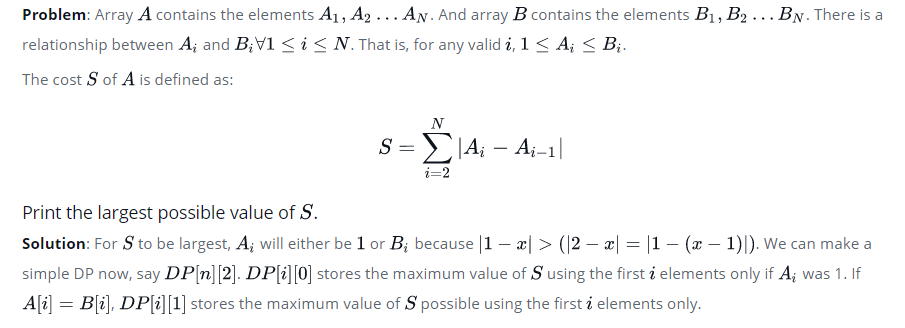

***https://ideone.com/LEjfZh***

***https://ideone.com/vwSZiC***

## **494. Sam and substrings**
https://www.hackerrank.com/challenges/sam-and-substrings/problem

In [50]:
/*
View Question For Problem Statement
*/

In [51]:
/*
A brute force approach to solve this problem is to generate all possible sub-strings of the given number. 
In the worst case scenario, for generating all possible sub-strings for N of size 2 * 105, it would take

        len(N) * (len(N) + 1) / 2 
                                    which is about 10^10 operations.

There is an efficient dynamic programming approach 
    which can solve this problem in linear time with respect to the given number.

Let's look at the algorithm for N = 5312,

all possible substrings are

        5 3 1 2 53 31 12 531 312 5312
                                        with a little bit of rearrangement,

        5 | 3 53 | 1 31 531 | 2 12 312 5312
         The above rearrangement lists all numbers that ends with 5, 3, 1 and 2 respectively.

Let sd[i] hold the sum of all digits that ends at N[i] i.e.,

sd[0] holds the sum of all digits that ends at N[0] = 5
sd[1] holds the sum of all digits that ends at N[1] = 3
sd[2] holds the sum of all digits that ends at N[2] = 1
sd[3] holds the sum of all digits that ends at N[3] = 2

If S is the final answer, then we have

        S = sd[0] + sd[1] + sd[2] + sd[3] 
        ie., S = ∑ sd[i] ∀ 0 ≤ i < len(N)

Now, given sd[i], let us see if we can calculate sd[i+1].

sd[2] = 1 + 31 + 531 = 563

sd[3] = 2 + 12 + 312 + 5312
sd[3] = 2 + 10 + 2 + 310 + 2 + 5310 + 2
sd[3] = 4 * 2 + 10 * (1 + 31 + 531 )
sd[3] = (3 + 1) * *N[3]* + 10 * *sd[2]*

on generalising, we get

sd[i+1] = (i + 2) * N[i] + 10 * sd[i]
sd[0] = N[0]

As S can be large, 
    we can use modulo equivalence at every step 
    ( Why? ) and print S % 109 + 7. 
    
This process takes O(len(N)) where len(N) is the size of the input.
*/

***https://ideone.com/QIwg59***

## **495. Candies**
https://www.hackerrank.com/challenges/candies/problem

In [52]:
/*
View Question For Problem Statement
*/

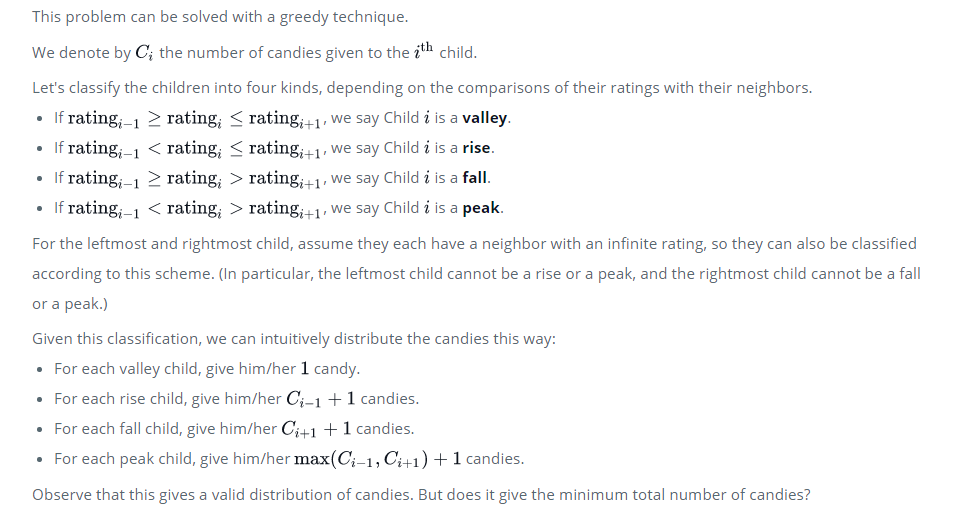

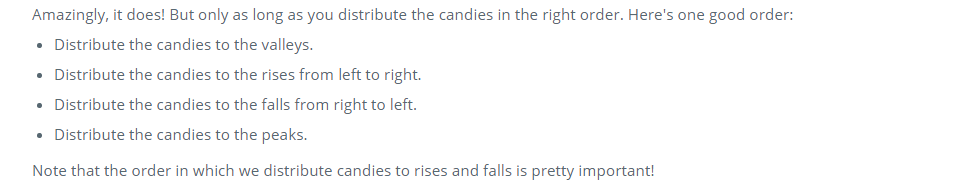

In [53]:
/*
Of course, we need to prove why this assignment works. We will prove two things:

1. It gives a valid distribution of candies.
2. It gives a the distribution with the minimum sum.
*/

***https://ideone.com/P89P9M***

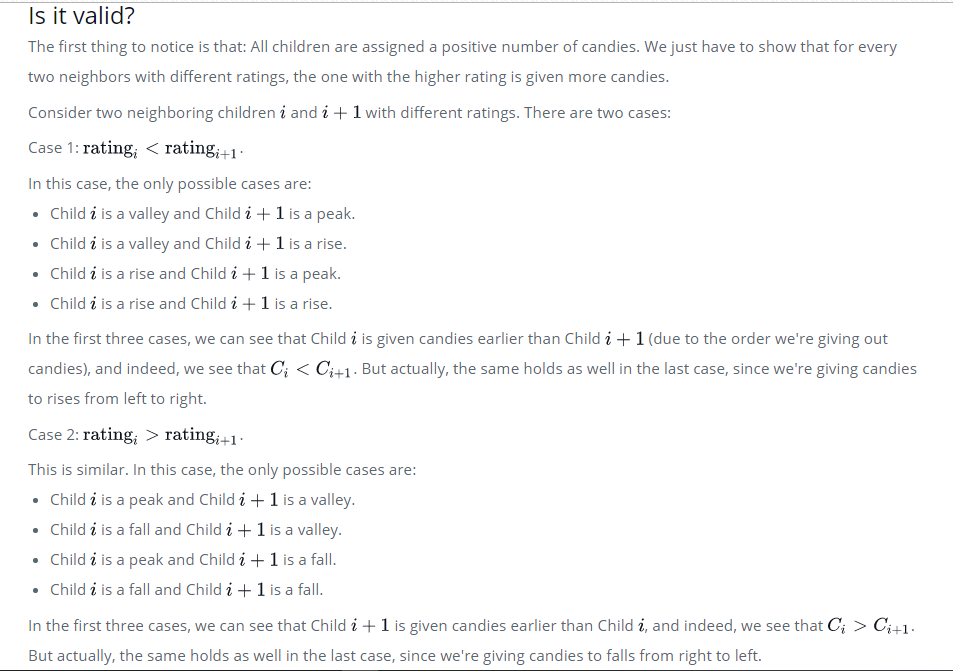

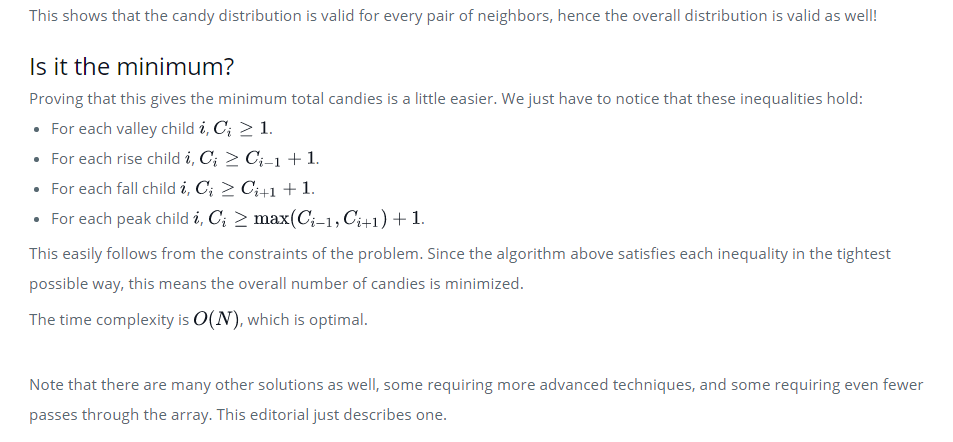

***https://ideone.com/3H2qUs***

## **496. For Union-Find Tag Question View Below Link**
https://www.geeksforgeeks.org/tag/union-find/

## **497. Disjoint Set (Or Union-Find) | Set 1 (Detect Cycle in an Undirected Graph)**
https://www.geeksforgeeks.org/union-find/

In [54]:
/*
A disjoint-set data structure is a data structure 
    that keeps track of a set of elements partitioned into a number of disjoint (non-overlapping) subsets.

A union-find algorithm is an algorithm 
    that performs two useful operations on such a data structure:

Find: 
    Determine which subset a particular element is in. 
    This can be used for determining if two elements are in the same subset.

Union: 
    Join two subsets into a single subset.
*/

In [55]:
/*
In this post, 
    we will discuss the application of Disjoint Set Data Structure. 
    The application is to check whether a given graph contains a cycle or not.

Union-Find Algorithm 
    can be used to check whether an undirected graph contains cycle or not. 
    
Note that we have discussed an algorithm to detect cycle. 
This is another method based on Union-Find. 
This method assumes that the graph doesn’t contain any self-loops.

We can keep track of the subsets in a 1D array, let’s call it parent[].

Let us consider the following graph:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/Cycle-in-graph.png"/>

In [56]:
/*
For each edge, 
    make subsets using both the vertices of the edge. 
    If both the vertices are in the same subset, a cycle is found.

Initially, all slots of parent array are initialized to -1 (means there is only one item in every subset).

0   1   2
-1 -1  -1 
Now process all edges one by one.

Edge 0-1: Find the subsets in which vertices 0 and 1 are. 
Since they are in different subsets, we take the union of them. 
For taking the union, either make node 0 as parent of node 1 or vice-versa.

0   1   2    <----- 1 is made parent of 0 (1 is now representative of subset {0, 1})
1  -1  -1
Edge 1-2: 1 is in subset 1 and 2 is in subset 2. So, take union.

0   1   2    <----- 2 is made parent of 1 (2 is now representative of subset {0, 1, 2})
1   2  -1
Edge 0-2: 0 is in subset 2 and 2 is also in subset 2. Hence, including this edge forms a cycle.

How subset of 0 is same as 2?
0->1->2 // 1 is parent of 0 and 2 is parent of 1
*/

In [57]:
class Graph 
{ 
    int V, E;    // V-> no. of vertices & E->no.of edges 
    Edge edge[]; // /collection of all edges 
  
    class Edge 
    { 
        int src, dest; 
    }; 
  
    // Creates a graph with V vertices and E edges 
    Graph(int v,int e) 
    { 
        V = v; 
        E = e; 
        edge = new Edge[E]; 
        for (int i=0; i<e; ++i) 
            edge[i] = new Edge(); 
    } 
  
    // A utility function to find the subset of an element i 
    int find(int parent[], int i) 
    { 
        if (parent[i] == -1) 
            return i; 
        return find(parent, parent[i]); 
    } 
  
    // A utility function to do union of two subsets 
    void Union(int parent[], int x, int y) 
    { 
        int xset = find(parent, x); 
        int yset = find(parent, y); 
        parent[xset] = yset; 
    } 
  
  
    // The main function to check whether a given graph 
    // contains cycle or not 
    int isCycle( Graph graph) 
    { 
        // Allocate memory for creating V subsets 
        int parent[] = new int[graph.V]; 
  
        // Initialize all subsets as single element sets 
        for (int i=0; i<graph.V; ++i) 
            parent[i]=-1; 
  
        // Iterate through all edges of graph, find subset of both 
        // vertices of every edge, if both subsets are same, then 
        // there is cycle in graph. 
        for (int i = 0; i < graph.E; ++i) 
        { 
            int x = graph.find(parent, graph.edge[i].src); 
            int y = graph.find(parent, graph.edge[i].dest); 
  
            if (x == y) 
                return 1; 
  
            graph.Union(parent, x, y); 
        } 
        return 0; 
    } 
}

In [58]:
// Driver Method 
public static void main (String[] args) 
{ 
    /* Let us create following graph 
     0 
    |  \ 
    |    \ 
    1-----2 */
    int V = 3, E = 3; 
    Graph graph = new Graph(V, E); 

    // add edge 0-1 
    graph.edge[0].src = 0; 
    graph.edge[0].dest = 1; 

    // add edge 1-2 
    graph.edge[1].src = 1; 
    graph.edge[1].dest = 2; 

    // add edge 0-2 
    graph.edge[2].src = 0; 
    graph.edge[2].dest = 2; 

    if (graph.isCycle(graph)==1) 
        System.out.println( "graph contains cycle" ); 
    else
        System.out.println( "graph doesn't contain cycle" ); 
} 
main(args);

graph contains cycle


In [59]:
/*
Note that the implementation of union() and find() is naive and takes O(n) time in worst case. 

These methods can be improved to O(Logn) using Union by Rank or Height. 
*/

***https://youtu.be/mHz-mx-8lJ8***

## **498. Median of two sorted arrays of different sizes**
https://www.geeksforgeeks.org/median-of-two-sorted-arrays-of-different-sizes/

In [60]:
/*
Already Discussed In 14 March 2020 Code
*/

## **499. How to efficiently implement k stacks in a single array?**
https://www.geeksforgeeks.org/efficiently-implement-k-stacks-single-array/

In [61]:
/*
Already Discussed In 27 March 2020 Code
*/

## **500. How to efficiently implement k Queues in a single array?**
https://www.geeksforgeeks.org/efficiently-implement-k-queues-single-array/

In [62]:
/*
Already Discussed In 27 March 2020 Code
*/